In [2]:
#import libarys
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import linear_model 
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
from sklearn.cluster import KMeans

In [3]:
dataNetflix = pd.read_csv("C:/Users/oisin/Downloads/CLeanNetflixData.csv")
dataNetflix.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,IMDB_Rating
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,"7.4 based on 22,005 user ratings"
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,6.0 based on 574 user ratings
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",4.6 based on 853 user ratings
3,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...,"6.8 based on 230,888 user ratings"
4,s6,TV Show,46,Serdar Akar,"Erdal Beşikçioğlu, Yasemin Allen, Melis Birkan...",Turkey,"July 1, 2017",2016,TV-MA,1 Season,"International TV Shows, TV Dramas, TV Mysteries",A genetics professor experiments with a treatm...,7.2 based on 12 user ratings


In [4]:
count = 0
for rating in dataNetflix.IMDB_Rating:
    value = rating.index(" ")
    rating = rating[:value]
    dataNetflix.IMDB_Rating[count] = rating
    count += 1

<ipython-input-4-8aa81166de59>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataNetflix.IMDB_Rating[count] = rating


In [5]:
dataNetflix.head(50)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,IMDB_Rating
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,7.4
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,6.0
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",4.6
3,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...,6.8
4,s6,TV Show,46,Serdar Akar,"Erdal Beşikçioğlu, Yasemin Allen, Melis Birkan...",Turkey,"July 1, 2017",2016,TV-MA,1 Season,"International TV Shows, TV Dramas, TV Mysteries",A genetics professor experiments with a treatm...,7.2
5,s7,Movie,122,Yasir Al Yasiri,"Amina Khalil, Ahmed Dawood, Tarek Lotfy, Ahmed...",Egypt,"June 1, 2020",2019,TV-MA,95 min,"Horror Movies, International Movies","After an awful accident, a couple admitted to ...",6.8
6,s8,Movie,187,Kevin Reynolds,"Samuel L. Jackson, John Heard, Kelly Rowan, Cl...",United States,"November 1, 2019",1997,R,119 min,Dramas,After one of his high school students attacks ...,6.7
7,s9,Movie,706,Shravan Kumar,"Divya Dutta, Atul Kulkarni, Mohan Agashe, Anup...",India,"April 1, 2019",2019,TV-14,118 min,"Horror Movies, International Movies","When a doctor goes missing, his psychiatrist w...",5.3
8,s10,Movie,1920,Vikram Bhatt,"Rajneesh Duggal, Adah Sharma, Indraneil Sengup...",India,"December 15, 2017",2008,TV-MA,143 min,"Horror Movies, International Movies, Thrillers",An architect and his wife move into a castle t...,6.4
9,s11,Movie,1922,Zak Hilditch,"Thomas Jane, Molly Parker, Dylan Schmid, Kaitl...",United States,"October 20, 2017",2017,TV-MA,103 min,"Dramas, Thrillers",A farmer pens a confession admitting to his wi...,6.3


In [6]:
count = 0
whatTypes = []
for Type in dataNetflix.listed_in:
    substring = ","
    count = Type.count(substring)
    if count == 0:
        if Type not in whatTypes:
            whatTypes.append(Type)
            print(Type)

    else:
        parts = Type.split(",")
        #print(parts)
        for num in parts:
            
            num =num.lstrip()
            if num not in whatTypes:
                print(num)
                whatTypes.append(num)
        
        count -= 1
        
print("Type of gener"len(whatTypes))


SyntaxError: invalid syntax (<ipython-input-6-e5ecd70366e1>, line 23)

In [7]:
# X.shape should be (N, M) where M >= 1
X = dataNetflix['listed_in']  
# y.shape should be (N, 1)
Y = dataNetflix['IMDB_Rating'] 
X = X.values.reshape(-1,1)
Y = Y.values.reshape(-1,1)
X_train, X_test, Y_train, X_train = train_test_split(X , Y, test_size=0.2)

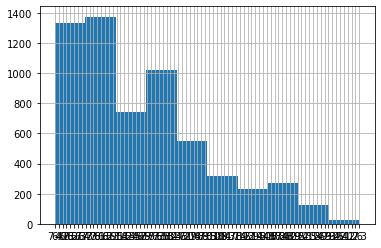

In [8]:
#plt.scatter(X_train,Y_train.astype(float))
#Y_train.hist(bins=30)
dataNetflix['IMDB_Rating']  .hist(bins=10)

# Coming up with the issue that so many films have so many different genres in the movies that they overlap a lot 